In [57]:
import pandas as pd
import os

# Specify the directory path you want to navigate to
directory_path = '/Users/greyhaneberg/Downloads'

# Change the current working directory to the specified directory
os.chdir(directory_path)
# Replace 'file_name.csv' with the actual name of your CSV file
df_2022 = pd.read_csv('mets_2022.csv')
df_2023 = pd.read_csv('mets_2023.csv')

In [58]:
# Group by opponent and calculate wins and losses
opponent_stats_2022 = df_2022.groupby('Opp')['W/L'].value_counts().unstack().fillna(0)
opponent_stats_2023 = df_2023.groupby('Opp')['W/L'].value_counts().unstack().fillna(0)

# Select only the 'L' and 'W' columns
opponent_stats_2022 = opponent_stats_2022[['L', 'W']]
opponent_stats_2023 = opponent_stats_2023[['L', 'W']]

# Rename the columns for better understanding
opponent_stats_2022.columns = ['Losses', 'Wins']
opponent_stats_2023.columns = ['Losses', 'Wins']

# Combine the wins and losses from both years
combined_opponent_stats = opponent_stats_2022.add(opponent_stats_2023, fill_value=0)

# Calculate total wins and losses
combined_opponent_stats['Total Wins'] = combined_opponent_stats['Wins'].fillna(0) + combined_opponent_stats['Wins'].fillna(0)
combined_opponent_stats['Total Losses'] = combined_opponent_stats['Losses'].fillna(0) + combined_opponent_stats['Losses'].fillna(0)

# Calculate and update the winning percentage
combined_opponent_stats['Win_Percentage'] = combined_opponent_stats['Total Wins'] / (combined_opponent_stats['Total Wins'] + combined_opponent_stats['Total Losses'])

# Sort by winning percentage
opponent_win_percentage = combined_opponent_stats['Win_Percentage'].sort_values(ascending=False)

print("Winning percentage against each individual team after combining years:")
for opponent, win_percentage in opponent_win_percentage.items():
    print(f"{opponent}: {win_percentage}")

Winning percentage against each individual team after combining years:
CLE: 1.0
OAK: 0.8333333333333334
ARI: 0.7692307692307693
MIA: 0.7142857142857143
PIT: 0.6923076923076923
WSN: 0.6774193548387096
CHW: 0.6666666666666666
CIN: 0.6363636363636364
PHI: 0.6333333333333333
STL: 0.6153846153846154
SFG: 0.5833333333333334
TBR: 0.5
COL: 0.5
SEA: 0.5
LAD: 0.5
CHC: 0.46153846153846156
MIL: 0.4166666666666667
SDP: 0.4166666666666667
LAA: 0.4
TEX: 0.4
ATL: 0.3870967741935484
NYY: 0.3333333333333333
BOS: 0.3333333333333333
MIN: 0.3333333333333333
HOU: 0.14285714285714285
BAL: 0.0
KCR: 0.0
DET: 0.0
TOR: 0.0


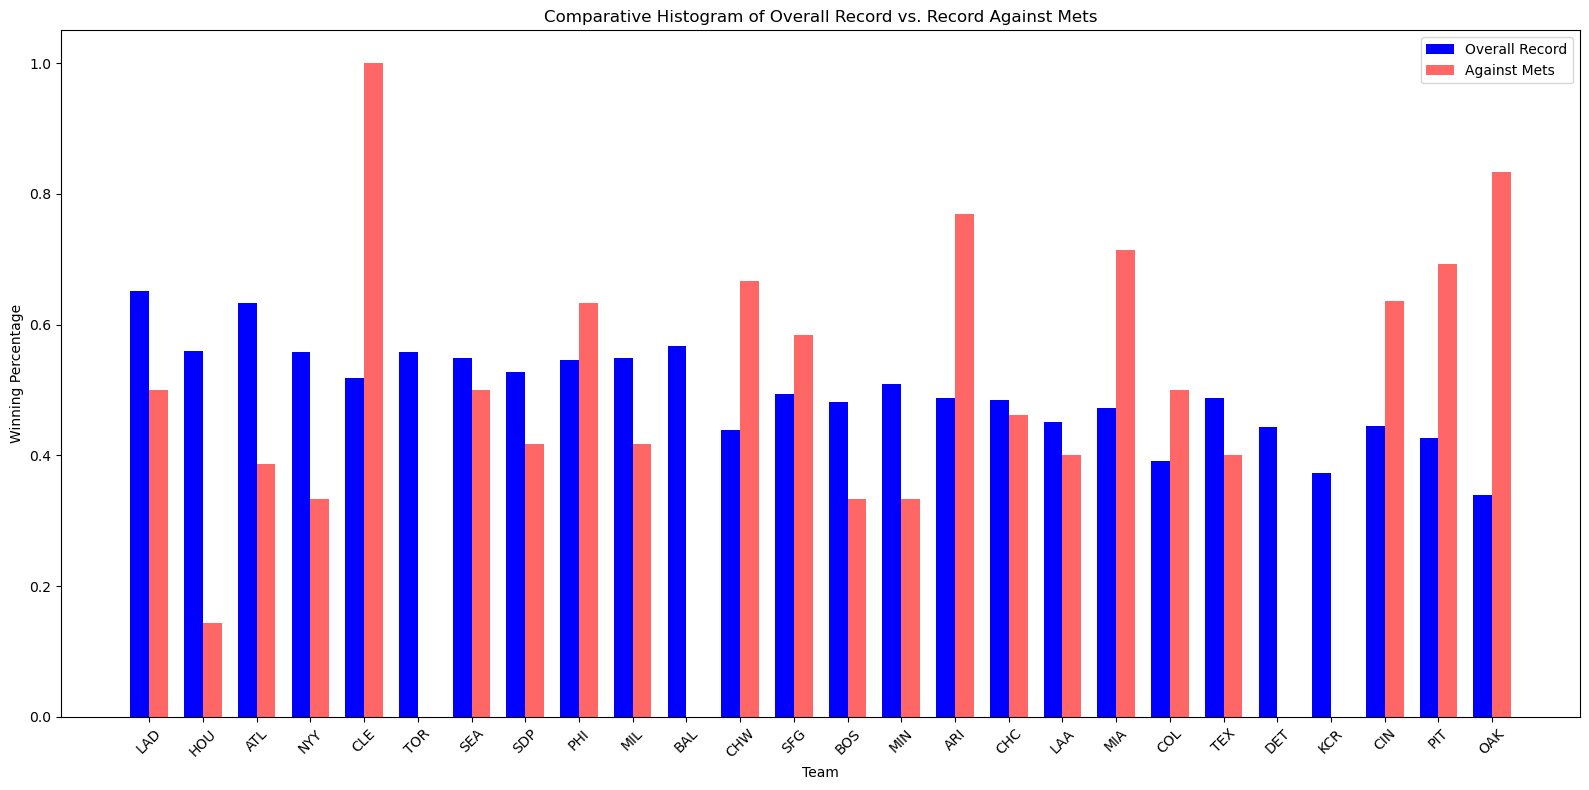

In [56]:
records = pd.read_csv('baseball.csv')

import matplotlib.pyplot as plt

# Merge the two DataFrames on the team symbol
merged_data = records.merge(combined_opponent_stats['Win_Percentage'], left_on='Team', right_index=True)

# Set the figure size
plt.figure(figsize=(16, 8))

# Calculate the position for each bar
bar_width = 0.35
x = np.arange(len(merged_data))

# Create grouped bars for each team
plt.bar(x - bar_width/2, merged_data['Average Win Percentage'], width=bar_width, color='b', label='Overall Record')
plt.bar(x + bar_width/2, merged_data['Win_Percentage'], width=bar_width, color='r', alpha=0.6, label="Against Mets")

plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.title('Comparative Histogram of Overall Record vs. Record Against Mets')
plt.legend()
plt.xticks(x, merged_data['Team'], rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Merge the two dataframes df_2022 and df_2023 on a common column, assuming 'Opp' as the common column
combined_df = pd.concat([df_2022, df_2023])

# Group by opponent and calculate average attendance
average_attendance = combined_df.groupby('Opp')['Attendance'].mean()

# Find the opponents with the largest and smallest average attendance
top_5_largest = average_attendance.nlargest(5)
top_5_smallest = average_attendance.nsmallest(5)

print("Five opponents with the largest average attendance:")
print(top_5_largest)

print("\nFive opponents with the smallest average attendance:")
print(top_5_smallest)

Five opponents with the largest average attendance:
Opp
NYY    45645.375000
LAD    44107.230769
TOR    40836.666667
SDP    36944.000000
PHI    36481.200000
Name: Attendance, dtype: float64

Five opponents with the smallest average attendance:
Opp
KCR    13898.666667
OAK    14967.333333
DET    15488.666667
CIN    23719.166667
MIA    25096.741935
Name: Attendance, dtype: float64


The five opponents with the lowest average attendance over the the 2022 and 2023 seasons were Kansas City, Oakland, Detroit, Cincinnati, and Miami. All of these opponents had sub-0.500 records for the season. None of the three lowest-attendance opponents were part of the same league, the NL. The low attendance to games against these opponents can probably be attributed to the fact that these teams were not particularly well-performing throughout the 2022 and 2023 seasons. Furthermore, Kansas City, Oakland, and Detroit are in the AL, and therefore do not directly compete with the New York Mets for a playoff position. This likely also played a factor in the low attendance.